# **Setup Inicial 0**

In [ ]:
!pip install scipy==1.2
!pip3 install pybalu==0.2.5
import pandas as pd
from sklearn.datasets import load_wine
from pybalu.feature_selection import sfs, clean
from IPython.display import clear_output
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, plot_confusion_matrix, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
clear_output()

In [ ]:
def minmax(X):
    ma = X.max(0)
    mi = X.min(0)
    md    = ma-mi    
    a     = 1/ md
    b     = -mi/md
    return X * a + b, a, b

# **Parte 1: Problema de regresión**

El dataset que utilizaremos en este ejemplo se llama Boston house-price, cuyo objetivo es tratar de predecir el precio de una casa a partir de distintas características. Puede encontrar el detalle en https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset


### **1.0. Cargamos los datos**

In [ ]:
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# Tomamos la matriz de características y los valores a predecir
X = df_boston.values[:,:-1]
y = df_boston.values[:, -1]

Una práctica común es limpiar y preprocesar los datos, en este caso normalizaremos las columnas

In [ ]:
X, _, _ = minmax(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## **1.1 Hacemos el split de los datos**

In [ ]:
np.random.seed(1)

In [ ]:
# En este caso tomaremos un split de 80:10:10 train/validation/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
len(X_train)/len(X) * 100, len(X_val)/len(X) * 100, len(X_test)/len(X) * 100

(79.84189723320159, 10.079051383399209, 10.079051383399209)

## **1.2 Entrenamos un modelo y hacemos predicciones**

In [ ]:
# definimos un modelo
model = LinearRegression()

# Lo fitteamos al conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacemos predicciones

y_pred = model.predict(X_test)

# Calculamos alguna métrica de error
mean_squared_error(y_test, y_pred)


21.402844327746852

## **1.3 Utilizamos el conjunto de validación para mejorar el rendimiento**

In [ ]:
# Usamos un modelo que sí tenga parámetros
model = RandomForestRegressor()
# Lo fitteamos al conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Calculamos alguna métrica de error
mean_squared_error(y_test, y_pred)

5.7769775098039124

Optimicemos por ejemplo, la cantidad de arboles de desición que utiliza nuestro regresor Random Forest

In [ ]:
estimators_list = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
errors_list = []
for n in estimators_list:
    model = RandomForestRegressor(n_estimators=n)
    # Lo fitteamos al conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Hacemos predicciones
    y_pred = model.predict(X_val)

    # Calculamos alguna métrica de error
    error = mean_squared_error(y_val, y_pred)
    errors_list.append(error)

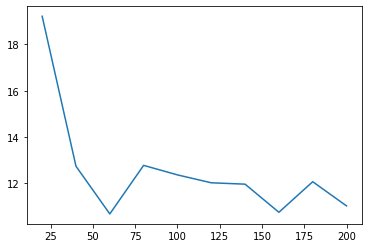

In [ ]:
# Podemos plotear la evolución 
plt.plot(estimators_list, errors_list)

In [ ]:
estimators_list = [20, 40, 60, 80, 100]
depths_list     = [6, 8, 10, 12]

best_n = None
best_depth = None

params_list = list(product(estimators_list, depths_list))
triumphs = np.array([0] * len(params_list))

for _ in range(50):
  best_error = 100
  for i in range(len(params_list)):
      n, depth = params_list[i]
      model = RandomForestRegressor(n_estimators=n, max_depth=depth)
      # Lo fitteamos al conjunto de entrenamiento
      model.fit(X_train, y_train)

      # Hacemos predicciones
      y_pred = model.predict(X_val)

      # Calculamos alguna métrica de error
      error = mean_squared_error(y_val, y_pred)
      if error < best_error:
        best_i = i
        best_error = error
  triumphs[best_i] += 1


In [ ]:
best_n, best_depth = params_list[np.argmax(triumphs)]
print(best_n, best_depth)

20 10


Evaluamos con la mejor combinación

In [ ]:
opt_errors = []
for _ in range(50):
    model = RandomForestRegressor(n_estimators=best_n, max_depth=best_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    opt_errors.append(error)
print(sum(opt_errors) / 50) 

5.840561528308698


# **Parte 2: Problema de clasificación**

## **2.0 Cargamos los datos**

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
# Normalizamos la matriz de características
y = data.target
X = df.values
X, _, _ = minmax(X)

## **2.1. Hacemos el split de los datos**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## **2.2. Optimización de hiperparámetros**

In [ ]:
model = LogisticRegression()
# Lo fitteamos al conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Calculamos alguna métrica de error
accuracy_score(y_test, y_pred)

1.0

In [ ]:
# Usamos un modelo que sí tenga parámetros
model = AdaBoostClassifier()
# Lo fitteamos al conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Calculamos alguna métrica de error
accuracy_score(y_test, y_pred)

0.9444444444444444

In [ ]:
# Se optimizará el número de weak clasifiers y learning rates

# Se generará una malla para generar 100 modelos AdaBoost
estimators_list = map(int, np.linspace(50, 200, 10))
lr_list         = np.linspace(0.001, 1.5, 10)

max_acc = 0
best_estimators = 0
best_lr = 0

for n, lr in product(estimators_list, lr_list):
  clf = AdaBoostClassifier(n_estimators=n, learning_rate=lr)
  clf.fit(X_train, y_train)
  # Hacemos predicciones
  y_pred = clf.predict(X_val)
  acc = accuracy_score(y_val, y_pred)
  if acc > max_acc:
    max_acc = acc
    best_estimators  = n
    best_lr          = lr
    print(f'NEW MAX: Accuracy con n_estimators={n} y learning rate={lr}: {acc * 100}% en set de validación')

NEW MAX: Accuracy con n_estimators=50 y learning rate=0.001: 83.33333333333334% en set de validación
NEW MAX: Accuracy con n_estimators=50 y learning rate=0.16755555555555557: 94.44444444444444% en set de validación
NEW MAX: Accuracy con n_estimators=66 y learning rate=1.5: 100.0% en set de validación


In [ ]:
model = AdaBoostClassifier(n_estimators=best_estimators, learning_rate=best_lr)
# Lo fitteamos al conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Calculamos alguna métrica de error
accuracy_score(y_test, y_pred)

1.0

También podemos reportar la matriz de confusión

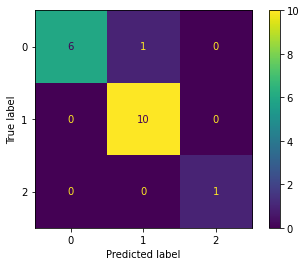

In [ ]:
# Usamos un modelo que sí tenga parámetros
model = AdaBoostClassifier()
# Lo fitteamos al conjunto de entrenamiento
model.fit(X_train, y_train)

# Calculamos alguna métrica de error
plot_confusion_matrix(model, X_test, y_test)